In [41]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from copy import deepcopy
from scipy.spatial.distance import cdist

In [45]:
#reading fulldata
data = pd.read_csv('fulldatetime.csv')
print("Input data and shape")
print(type(data['Time']))
print(len(data))

Input data and shape
<class 'pandas.core.series.Series'>
576574


In [43]:
#Filtering for date; 2018-02-09 and hour 5-6 PM
hourdatafields = ['LUID', 'Date', 'Latitude', 'Longitude', 'Floor', 'BuildingID', 'Time']
hourdata = []
for i in range(0, len(data)):
    if(data['Date'][i] == '2018-02-09'):
        timesplit = data['Time'][i].split(':')
        filters = [timesplit[0]]
        if(timesplit[0] == "17"):
            hourdata.append({hourdatafields[j]:data.iloc[i][j] for j in range(0,len(hourdatafields))})

In [44]:
print(len(hourdata))
print(hourdata)

448
[{'LUID': '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3', 'Date': '2018-02-09', 'Latitude': 38.991715338701724, 'Longitude': -76.94267575842309, 'Floor': 6, 'BuildingID': 96, 'Time': '17:00:10'}, {'LUID': '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3', 'Date': '2018-02-09', 'Latitude': 38.991715338701724, 'Longitude': -76.94267575842309, 'Floor': 6, 'BuildingID': 96, 'Time': '17:00:27'}, {'LUID': '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3', 'Date': '2018-02-09', 'Latitude': 38.99175096659725, 'Longitude': -76.94285589324214, 'Floor': 6, 'BuildingID': 96, 'Time': '17:00:41'}, {'LUID': '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3', 'Date': '2018-02-09', 'Latitude': 38.99175096659725, 'Longitude': -76.94285589324214, 'Floor': 6, 'BuildingID': 96, 'Time': '17:00:59'}, {'LUID': '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3', 'Date': '2018-02-09', 'Latitude': 38.99175096659725, 'Longit

In [46]:
#Saves this data in onedayonehour file
os.remove("onedayonehour.csv")
csv_file = "onedayonehour.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=hourdatafields)
        writer.writeheader()
        for data in hourdata:a
            writer.writerow(data)
except IOError:
    print("I/O error")

In [47]:
#reading onedayonehour file
one = pd.read_csv('onedayonehour.csv')
print("Input data and shape")
print(type(one))
one
one.drop(columns=['Time'])
os.remove("temporary.csv")
one.to_csv("temporary.csv", sep=',')

Input data and shape
<class 'pandas.core.frame.DataFrame'>


In [39]:
hourdatafields = ['LUID', 'Date', 'Latitude', 'Longitude', 'Floor', 'BuildingID']
hourdata = []
for i in range(0, len(data)):
    hourdata.append({hourdatafields[j]:one.iloc[i][j] for j in range(0,len(hourdatafields))})

In [40]:
#Saves this data in onedayonehour file
os.remove("onedayonehour.csv")
csv_file = "onedayonehour.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=hourdatafields)
        writer.writeheader()
        for data in hourdata:
            writer.writerow(data)
except IOError:
    print("I/O error")

In [8]:
f3 = one['LUID'].values
print(f3)

['1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db39243a95aa176273e3'
 '1693c816aabec8cf188172bf3b81a9ea16ea8d8558d9db

In [9]:
print(max(one['Latitude']))
print(max(one['Longitude']))

38.99233814781998
-76.9362518410093


In [10]:
#2 features on which clustering should happen
f1 = one['Latitude'].values
f2 = one['Longitude'].values
print(type(f1[0]))
print(f1)
print("Hello")
print(type(f2[0]))
print(f2)

<class 'numpy.float64'>
[38.99171534 38.99171534 38.99175097 38.99175097 38.99175097 38.99175097
 38.99175097 38.99166692 38.99166692 38.99166692 38.99166692 38.99166703
 38.99166703 38.99166703 38.99166703 38.99168698 38.99168698 38.99168698
 38.99168698 38.99166703 38.99166703 38.99166703 38.99166703 38.99171113
 38.99166703 38.99166703 38.99166703 38.99166703 38.99166703 38.99166703
 38.99166703 38.99166703 38.99166703 38.99166703 38.99166703 38.99166703
 38.99166703 38.99166703 38.99166703 38.99166703 38.99166703 38.99166703
 38.99166703 38.99166703 38.99166703 38.99166703 38.99166703 38.99166703
 38.99166703 38.99166703 38.99166703 38.99171534 38.99171534 38.99171089
 38.99171089 38.99170698 38.99170698 38.99170698 38.99170698 38.99170698
 38.99170698 38.99168305 38.99172697 38.99172697 38.99172697 38.99172697
 38.99174509 38.99174509 38.99174509 38.99174509 38.99174509 38.99172697
 38.99172697 38.99172697 38.99172697 38.99172697 38.99172697 38.99172697
 38.99172697 38.99172697 38

In [17]:
#upto 5 decimal points (1.1 m)
##now doing upto 4 decimal points
for i in range(0, len(f1)):
    f1[i] = float(f1[i] * 10000)
    f1[i] = float(f1[i] % 1000)
    
for i in range(0, len(f2)):
    f2[i] = float(f2[i] * 10000)
    f2[i] = float(f2[i] % 1000)

In [18]:
print(f1)
print("Hello")
print(f2)

[917.15338702 917.15338702 917.50966597 917.50966597 917.50966597
 917.50966597 917.50966597 916.66918955 916.66918955 916.66918955
 916.66918955 916.6703031  916.6703031  916.6703031  916.6703031
 916.86981116 916.86981116 916.86981116 916.86981116 916.6703031
 916.6703031  916.6703031  916.6703031  917.11128891 916.6703031
 916.6703031  916.6703031  916.6703031  916.6703031  916.6703031
 916.6703031  916.6703031  916.6703031  916.6703031  916.6703031
 916.6703031  916.6703031  916.6703031  916.6703031  916.6703031
 916.6703031  916.6703031  916.6703031  916.6703031  916.6703031
 916.6703031  916.6703031  916.6703031  916.6703031  916.6703031
 916.6703031  917.15338702 917.15338702 917.10893318 917.10893318
 917.0698167  917.0698167  917.0698167  917.0698167  917.0698167
 917.0698167  916.83050223 917.26972926 917.26972926 917.26972926
 917.26972926 917.4509     917.4509     917.4509     917.4509
 917.4509     917.26972926 917.26972926 917.26972926 917.26972926
 917.26972926 917.26972

In [11]:
#zipping the features
X = np.array(list(zip(f1, f2)))

[[ 389906. -769367.]
 [ 389907. -769425.]
 [ 389913. -769421.]]


Text(0.5,1,'Latitude vs Longitude (1.1 m)')

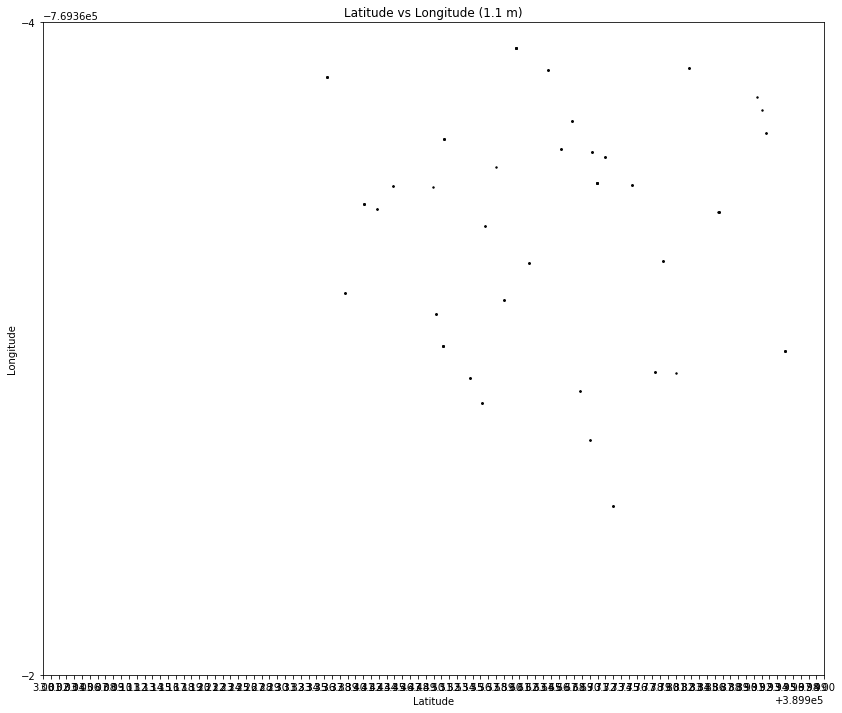

In [102]:
#Number of clusters = 3
k = 3

#Random centroids
C_x = np.random.randint(389903, 389924, size=k)
C_y = np.random.randint(-769430, -769362, size=k)

C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
print(C)

#Before clustering, just plotting the points
fig, ax = plt.subplots(figsize=(14, 12))

# tick_spacingx = 1
# tick_spacingy = 2

tick_spacingx = 0.01
tick_spacingy = 2

ax.xaxis.set_major_locator(plt.MultipleLocator(tick_spacingx))
ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))

plt.scatter(f1, f2, c='#050505', s = 2)
plt.scatter(C_x, C_y, marker='*', s = 100, c='g')

# plt.xlim([389903, 389924])
# plt.ylim([-769362, -769430])

plt.xlim([389903, 389904])
plt.ylim([-769362, -769364])

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude vs Longitude (1.1 m)")